In [1]:
import pandas as pd

# Note the 'r' before the string — it tells Python to treat it as a raw path
file_path = r"C:\Users\Sumit reddy\Desktop\Homeworks\AI Receptive\Project\smart_home_energy_consumption_large.csv"

# Load the CSV file
df = pd.read_csv(file_path)

# Display basic info
print("✅ Dataset loaded successfully!")
print("Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()


✅ Dataset loaded successfully!
Shape: (100000, 8)

Columns: ['Home ID', 'Appliance Type', 'Energy Consumption (kWh)', 'Time', 'Date', 'Outdoor Temperature (°C)', 'Season', 'Household Size']


,Home ID,Appliance Type,Energy Consumption (kWh),Time,Date,Outdoor Temperature (°C),Season,Household Size
0,94,Fridge,0.20,21:12,2023-12-02,-1.0,Fall,2
1,435,Oven,0.23,20:11,2023-08-06,31.1,Summer,5
2,466,Dishwasher,0.32,06:39,2023-11-21,21.3,Fall,3
3,496,Heater,3.92,21:56,2023-01-21,-4.2,Winter,1
4,137,Microwave,0.44,04:31,2023-08-26,34.5,Summer,5


In [2]:
# Data types
print("\nData types:")
print(df.dtypes)

# Missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Basic statistics
print("\nDescriptive Statistics:")
print(df.describe())



Data types:
Home ID                       int64
Appliance Type               object
Energy Consumption (kWh)    float64
Time                         object
Date                         object
Outdoor Temperature (°C)    float64
Season                       object
Household Size                int64
dtype: object

Missing values per column:
Home ID                     0
Appliance Type              0
Energy Consumption (kWh)    0
Time                        0
Date                        0
Outdoor Temperature (°C)    0
Season                      0
Household Size              0
dtype: int64

Descriptive Statistics:
             Home ID  Energy Consumption (kWh)  Outdoor Temperature (°C)  \
count  100000.000000             100000.000000             100000.000000   
mean      250.374980                  1.499952                 14.950135   
std       144.435367                  1.181176                 14.438755   
min         1.000000                  0.100000                -10.000000   

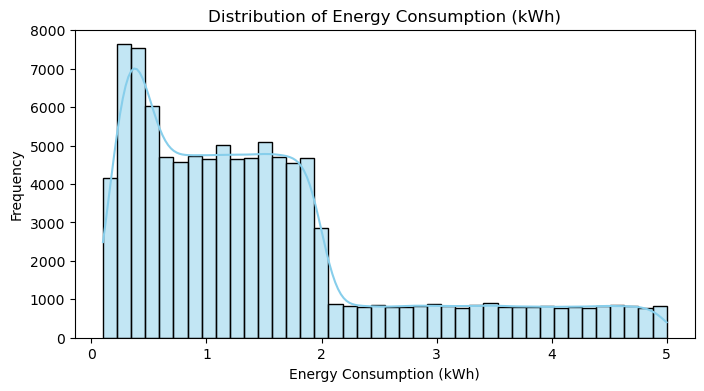

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Energy Consumption (kWh)'], bins=40, kde=True, color='skyblue')
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()


C:\Users\Sumit reddy\AppData\Local\Temp\ipykernel_34564\932744396.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=appliance_avg.index, y=appliance_avg.values, palette='coolwarm')


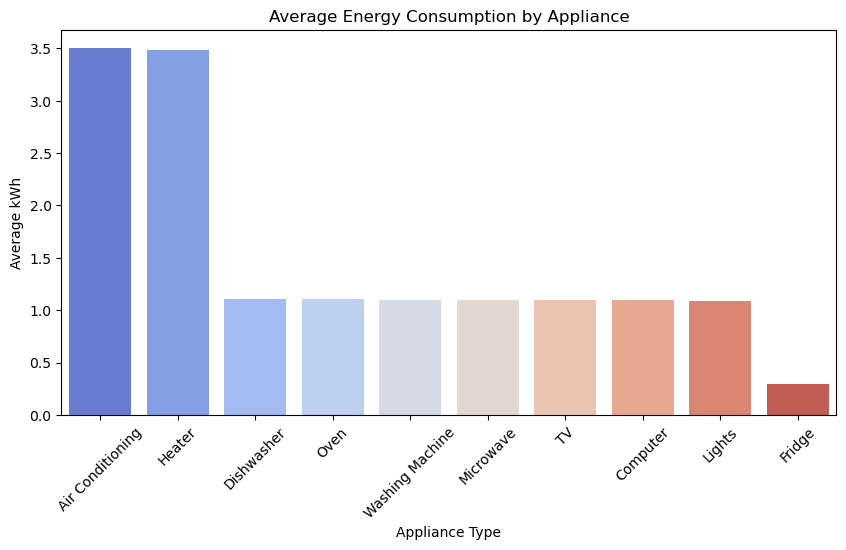

In [4]:
plt.figure(figsize=(10,5))
appliance_avg = df.groupby('Appliance Type')['Energy Consumption (kWh)'].mean().sort_values(ascending=False)
sns.barplot(x=appliance_avg.index, y=appliance_avg.values, palette='coolwarm')
plt.title('Average Energy Consumption by Appliance')
plt.xticks(rotation=45)
plt.ylabel('Average kWh')
plt.show()


C:\Users\Sumit reddy\AppData\Local\Temp\ipykernel_34564\839397295.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='Energy Consumption (kWh)', data=df, palette='viridis')


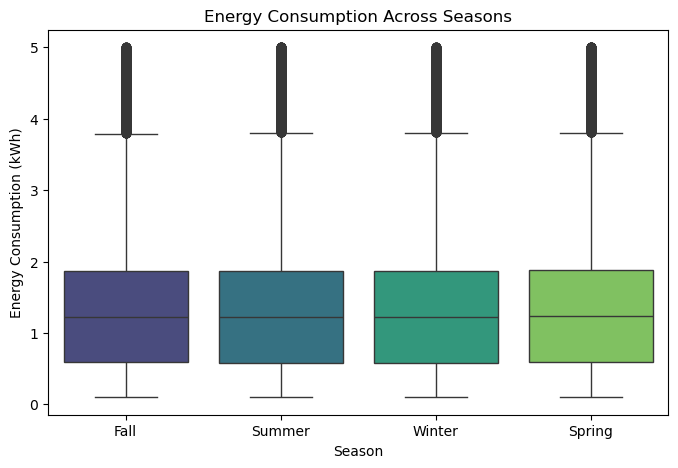

In [5]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='Energy Consumption (kWh)', data=df, palette='viridis')
plt.title('Energy Consumption Across Seasons')
plt.xlabel('Season')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


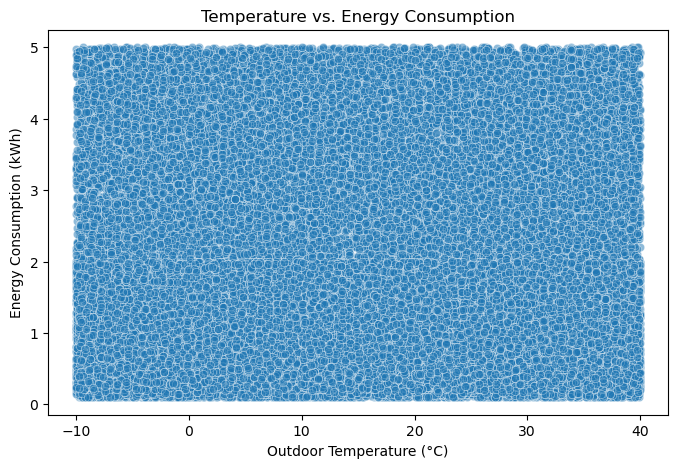

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Outdoor Temperature (°C)', y='Energy Consumption (kWh)', data=df, alpha=0.5)
plt.title('Temperature vs. Energy Consumption')
plt.xlabel('Outdoor Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


C:\Users\Sumit reddy\AppData\Local\Temp\ipykernel_34564\2043751645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Household Size', y='Energy Consumption (kWh)', data=df, palette='cubehelix')


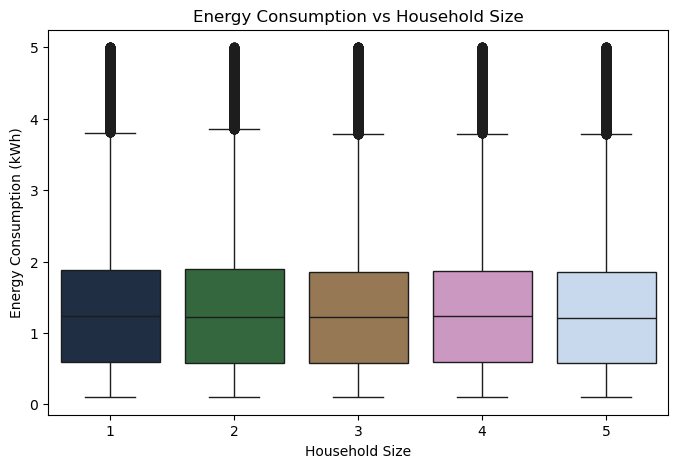

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Household Size', y='Energy Consumption (kWh)', data=df, palette='cubehelix')
plt.title('Energy Consumption vs Household Size')
plt.xlabel('Household Size')
plt.ylabel('Energy Consumption (kWh)')
plt.show()


C:\Users\Sumit reddy\AppData\Local\Temp\ipykernel_34564\519115889.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Energy Consumption (kWh)', data=df, ci=None, estimator='mean')


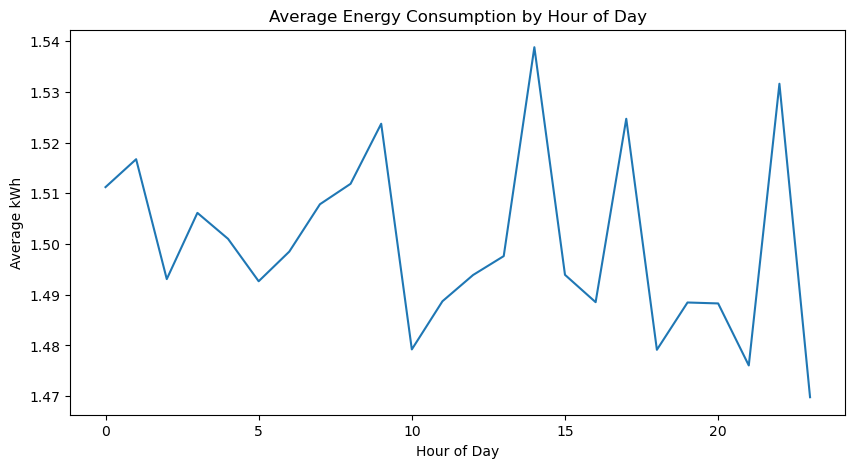

In [8]:
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
plt.figure(figsize=(10,5))
sns.lineplot(x='Hour', y='Energy Consumption (kWh)', data=df, ci=None, estimator='mean')
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average kWh')
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# --- Feature Engineering ---
df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Encode categorical variables
le_appliance = LabelEncoder()
le_season = LabelEncoder()
df['Appliance Encoded'] = le_appliance.fit_transform(df['Appliance Type'])
df['Season Encoded'] = le_season.fit_transform(df['Season'])

# Select features for prediction
features = ['Appliance Encoded', 'Outdoor Temperature (°C)',
            'Season Encoded', 'Household Size', 'Hour', 'Month']
target = 'Energy Consumption (kWh)'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 80000
Testing samples: 20000


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train model
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}")
print(f"R² Score: {r2:.3f}")


RMSE: 0.617
R² Score: 0.729


C:\Users\Sumit reddy\AppData\Local\Temp\ipykernel_34564\4126878546.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance.values, y=importance.index, palette='crest')


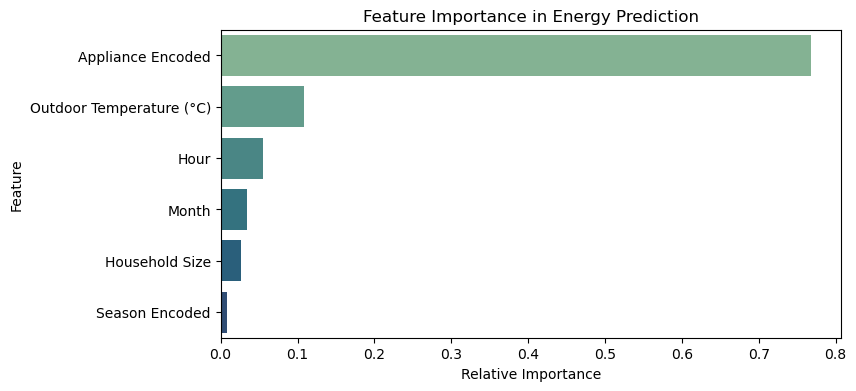

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

importance = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x=importance.values, y=importance.index, palette='crest')
plt.title('Feature Importance in Energy Prediction')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()


In [12]:
!pip install xgboost


In [13]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.3f}")
print(f"XGBoost R²: {r2_xgb:.3f}")


XGBoost RMSE: 0.586
XGBoost R²: 0.755


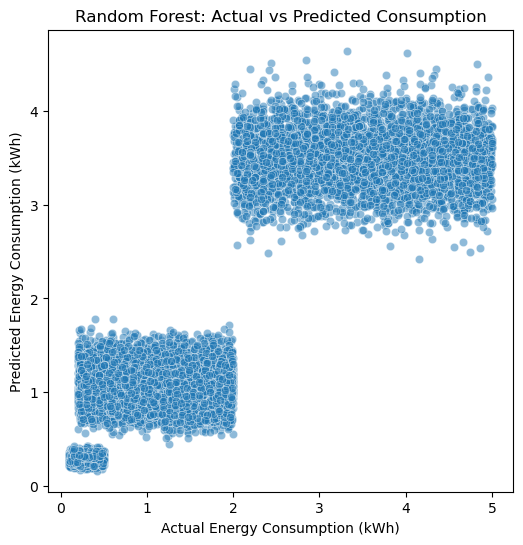

In [14]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Energy Consumption (kWh)")
plt.ylabel("Predicted Energy Consumption (kWh)")
plt.title("Random Forest: Actual vs Predicted Consumption")
plt.show()


In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['DayOfWeek'] = pd.to_datetime(df['Date']).dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].isin([5, 6]).astype(int)

# Encode text columns
le_appliance = LabelEncoder()
le_season = LabelEncoder()
df['Appliance Encoded'] = le_appliance.fit_transform(df['Appliance Type'])
df['Season Encoded'] = le_season.fit_transform(df['Season'])


In [32]:
features = [
    'Appliance Encoded', 'Outdoor Temperature (°C)',
    'Season Encoded', 'Household Size',
    'Hour', 'Month', 'DayOfWeek', 'IsWeekend'
]
target = 'Energy Consumption (kWh)'


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.3f}, R²: {r2:.3f}")


RMSE: 0.605, R²: 0.740


In [36]:
def predict_energy(appliance, temp, season, household, time_str, date_str):
    appliance_enc = le_appliance.transform([appliance])[0]
    season_enc = le_season.transform([season])[0]
    t = pd.to_datetime(time_str, format='%H:%M')
    d = pd.to_datetime(date_str)
    
    hour = t.hour
    month = d.month
    day_of_week = d.dayofweek
    is_weekend = int(day_of_week in [5, 6])
    
    X_new = pd.DataFrame([[appliance_enc, temp, season_enc, household, hour, month, day_of_week, is_weekend]],
                         columns=features)
    pred = rf_model.predict(X_new)[0]
    return round(pred, 3)


In [38]:
predict_energy('Heater', 3.5, 'Winter', 3, '21:00', '2023-12-02')


3.544

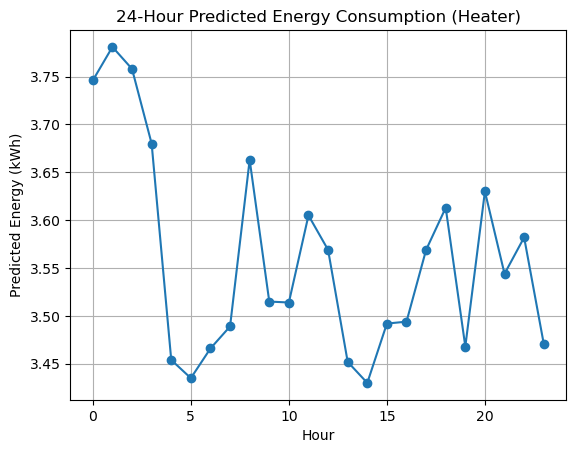

In [40]:
import matplotlib.pyplot as plt

hours = list(range(24))
preds = [predict_energy('Heater', 3.5, 'Winter', 3, f"{h:02d}:00", '2023-12-02') for h in hours]

plt.plot(hours, preds, marker='o')
plt.title('24-Hour Predicted Energy Consumption (Heater)')
plt.xlabel('Hour')
plt.ylabel('Predicted Energy (kWh)')
plt.grid(True)
plt.show()
